In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [14]:
#pattern 1
spcep_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\pattern_3\\flink_resultsPattern3-SPCEP_mod.xlsx"

# Define the columns and row range
columns = ["B", "D", "F", "H", "J"]
excel_sheets = ["LatP3", "LatP6", "LatP9"]
start_row = 2

In [15]:
custom_palette = {
    "LatP9": "#FFDAB9",  # light orange
    "LatP6": "#90EE90",  # light green
    "LatP3": "#ADD8E6",  # light blue
}

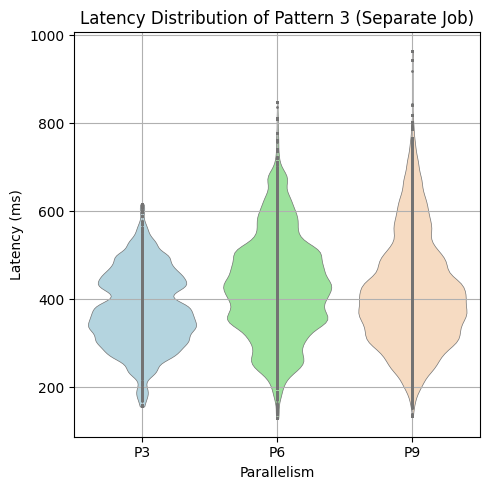

In [16]:
# Open the workbook
wb = load_workbook(filename=spcep_file_path, data_only=True)

end_row = 6081

# Extract data into a dictionary
data = {ss: [] for ss in excel_sheets}

sheet_names = excel_sheets
for sh in sheet_names:
    sheet = wb[sh]
    for col in columns:
        for row in range(start_row, end_row + 1):
            data[sh].append(sheet[f"{col}{row}"].value)

# Convert to a DataFrame for seaborn
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(var_name="Parallelism", value_name="Latency")

# Plot a violin plot
#(8,6)
plt.figure(figsize=(5, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    data=df_melted,
    inner="point",
    palette=custom_palette,
    hue="Parallelism",
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 3 (Separate Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0, 1, 2], labels=["P3", "P6", "P9"])

plt.grid(True)
plt.tight_layout()
plt.show()